In [1]:
import pandas as pd

df_positive = pd.read_csv('positive.tsv', sep='\t')
df_negative = pd.read_csv('augmented_negative.tsv', sep='\t')
df_neutral = pd.read_csv('augmented_neutral.tsv', sep='\t')

df = df_positive.append(df_negative, ignore_index=True)
df = df.append(df_neutral, ignore_index=True)

df.head()

C:\Users\B\AppData\Local\Temp\ipykernel_12864\1115111860.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_positive.append(df_negative, ignore_index=True)
C:\Users\B\AppData\Local\Temp\ipykernel_12864\1115111860.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_neutral, ignore_index=True)


,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,lokasi strategis di jalan sumatera bandung . t...,positive
2,betapa bahagia nya diri ini saat unboxing pake...,positive
3,"makanan beragam , harga makanan di food stall ...",positive
4,"tempat unik , bagus buat foto , makanan enak ,...",positive


In [2]:
df = df.sample(frac = 1)
df.head()

,text,label
23460,AgaricPro adalah produk herbal madu fermentasi...,neutral
22921,"Lucius Karus, pengamat politik dari Forum Masy...",neutral
5983,ayam nya enak sekali . tapi sambal nya kurang ...,positive
15286,Saya kurang suka dengan cara pelatih timnas U1...,negative
7873,selama iblis binatang ini jadi kapolri jangan ...,negative


In [3]:
df.shape

(23629, 2)

In [4]:
df.label.value_counts()

neutral     8202
negative    8068
positive    7359
Name: label, dtype: int64

In [8]:
import re 

def cleansing(sent):
    # Mengubah kata menjadi huruf kecil semua dengan menggunakan fungsi lower()
    string = sent.lower()
    # Menghapus emoticon dan tanda baca menggunakan "RegEx" dengan script di bawah
    string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
    return string

In [9]:
df['text_clean'] = df.text.apply(cleansing)
df.head()

,text,label,text_clean
23460,AgaricPro adalah produk herbal madu fermentasi...,neutral,agaricpro adalah produk herbal madu fermentasi...
22921,"Lucius Karus, pengamat politik dari Forum Masy...",neutral,lucius karus pengamat politik dari forum masy...
5983,ayam nya enak sekali . tapi sambal nya kurang ...,positive,ayam nya enak sekali tapi sambal nya kurang ...
15286,Saya kurang suka dengan cara pelatih timnas U1...,negative,saya kurang suka dengan cara pelatih timnas u1...
7873,selama iblis binatang ini jadi kapolri jangan ...,negative,selama iblis binatang ini jadi kapolri jangan ...


In [10]:
total_data = df.text_clean.tolist()
total_data[0:5]

['agaricpro adalah produk herbal madu fermentasi yang memiliki banyak khasiat kompleks karena merupakan kombinasi dari berbagai tanaman herbal ',
 'lucius karus  pengamat politik dari forum masyarakat dpr ri terkait  mengungkapkan sejumlah faktor yang menyebabkan pemilih berpaling dari partai demokrat ',
 'ayam nya enak sekali   tapi sambal nya kurang oke rasanya agak pahit san asam   lebih baik tak awal dan bikin sambal sendiri dirumah  ',
 'saya kurang suka dengan cara pelatih timnas u16 yang melarang pemainnya diwawancarai teman teman media  di luar sana  para pemain muda diajari public speaking baik di depan media maupun di depan masyarakat  pelatih atau manajer harus cukup membatasi apa yang tidak boleh dibagikan kepada media ',
 'selama iblis binatang ini jadi kapolri jangan berharap ada keadilan terhadap islam dia ini pki berkedok islam  ']

In [11]:
labels = df.label.tolist()
labels[0:5]

['neutral', 'neutral', 'positive', 'negative', 'negative']

In [12]:
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import defaultdict

max_features = 100000
tokenizer = Tokenizer(num_words=max_features, split=' ', lower=True)
tokenizer.fit_on_texts(total_data)
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("tokenizer.pickle has been created!")

X = tokenizer.texts_to_sequences(total_data)

vocab_size = len(tokenizer.word_index)
maxlen = max(len(x) for x in X)

X = pad_sequences(X)
with open('x_pad_sequences.pickle', 'wb') as handle:
    pickle.dump(X, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("x_pad_sequences.pickle has been created!")

tokenizer.pickle has been created!
x_pad_sequences.pickle has been created!


In [13]:
X

array([[    0,     0,     0, ...,   242,  2404,  3277],
       [    0,     0,     0, ...,    17,   161,   123],
       [    0,     0,     0, ...,   197,   204,  3862],
       ...,
       [    0,     0,     0, ...,   355,   663,   401],
       [    0,     0,     0, ...,   128, 12774,  8272],
       [    0,     0,     0, ...,    19,   169,    15]])

In [14]:
X.shape

(23629, 96)

In [15]:
Y = pd.get_dummies(labels)
Y = Y.values

with open('y_labels.pickle', 'wb') as handle:
    pickle.dump(Y, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("y_labels.pickle has been created!")

y_labels.pickle has been created!


In [16]:
Y

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [17]:
Y.shape

(23629, 3)

In [19]:
from sklearn.model_selection import train_test_split

file = open("x_pad_sequences.pickle",'rb')
X = pickle.load(file)
file.close()

file = open("y_labels.pickle",'rb')
Y = pickle.load(file)
file.close()

X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=False, stratify=None, test_size = 0.2)

In [20]:
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import Flatten
from tensorflow.keras import backend as K

embed_dim = 100
units = 64

model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
model.add(LSTM(units, dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test), verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 96, 100)           10000000  
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 10,042,435
Trainable params: 10,042,435
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1891/1891 [==============================] - 354s 185ms/step - loss: 0.3547 - accuracy: 0.8664 - val_loss: 0.2165 - val_accuracy: 0.9215
Epoch 2/10
1891/1891 [==============================] - 441s 233ms/step - loss: 0.1311 - accuracy: 0.9559 - val_loss: 0.2245 - val_accuracy: 0.9162
Epoch 3

In [21]:
from sklearn import metrics

predictions = model.predict(X_test)
y_pred = predictions
matrix_test = metrics.classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Testing selesai")
print(matrix_test)

148/148 [==============================] - 7s 41ms/step
Testing selesai
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1597
           1       0.96      0.97      0.96      1672
           2       0.94      0.91      0.93      1457

    accuracy                           0.94      4726
   macro avg       0.94      0.94      0.94      4726
weighted avg       0.94      0.94      0.94      4726



In [22]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig = plot_confusion_matrix(model, X_test, y_test)
fig.figure_.suptitle("Sentiment Analysis With TFIDF Vectorizer and Neural Network (MLPClassifier)")
plt.show()

C:\Users\B\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: plot_confusion_matrix only supports classifiers

In [23]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

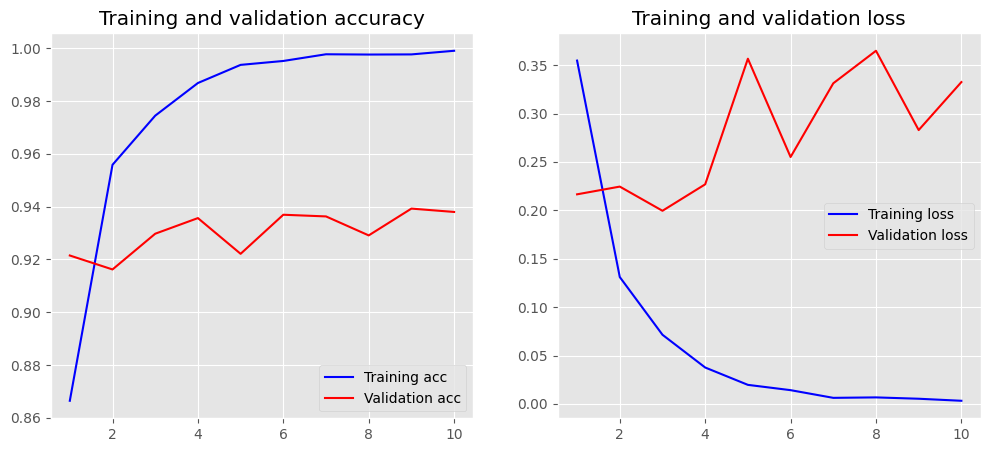

In [24]:
# history.history
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(history)

In [25]:
model.save('model.h5')
print("Model has been created!")

Model has been created!


In [30]:
import re 
from keras.models import load_model

input_text = """
Selalu bersyukur di segala kondisi.
"""

def cleansing(sent):
    # Mengubah kata menjadi huruf kecil semua dengan menggunakan fungsi lower()
    string = sent.lower()
    # Menghapus emoticon dan tanda baca menggunakan "RegEx" dengan script di bawah
    string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
    return string

sentiment = ['negative', 'neutral', 'positive']

text = [cleansing(input_text)]
predicted = tokenizer.texts_to_sequences(text)
guess = pad_sequences(predicted, maxlen=X.shape[1])

model = load_model('model.h5')
prediction = model.predict(guess)
polarity = np.argmax(prediction[0])

print("Text: ",text[0])
print("Sentiment: ",sentiment[polarity])

1/1 [==============================] - 1s 593ms/step
Text:   selalu bersyukur di segala kondisi  
Sentiment:  positive
